The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training set size: 4603
Testing set size: 1150


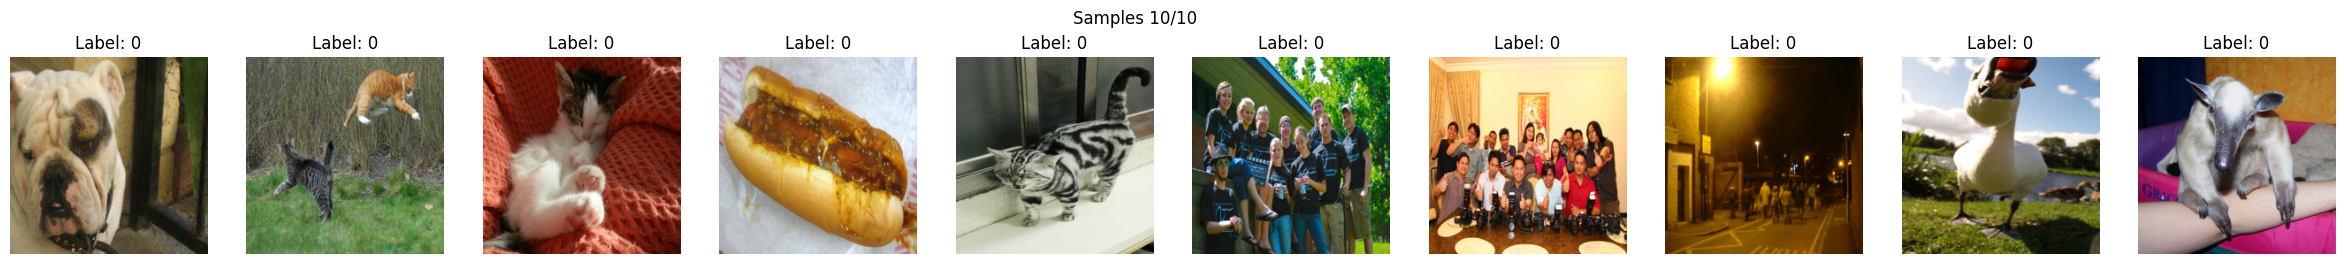

Image shape:  torch.Size([3, 224, 224])


In [10]:
import numpy as np
from dataset import HotdogOrNotDataset, visualize_samples
import torchvision
from torchvision import transforms
%load_ext autoreload
%autoreload 2

train_folder = 'data/train'
test_folder = 'data/test'

train_dataset = HotdogOrNotDataset(train_folder, transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
]))

test_dataset = HotdogOrNotDataset(test_folder, transform = transforms.Compose([ 
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
]))

print("Training set size:", len(train_dataset))
print("Testing set size:", len(test_dataset))
indices = np.random.choice(np.arange(len(train_dataset)), 10, replace=False)
visualize_samples(train_dataset, indices, "Samples")
img, y, label = train_dataset[0]
print("Image shape: ", img.shape)

In [11]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import transforms


num_samples = len(train_dataset)
ind_valid = np.random.choice(num_samples, 750, replace=False)
ind_train = np.array(list(set(range(num_samples)).difference(set(ind_valid))))

train_subset = Subset(train_dataset, ind_train)
valid_subset = Subset(train_dataset, ind_valid)

batch_size = 32 
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [14]:
import torch
import torchvision
from resnet import ResNet, ResidualBlock
device = torch.device('cpu')

torch_model = ResNet(ResidualBlock, [3, 4, 6, 3]).to(device)
# Set the model in evaluation mode.
torch_model.eval()

# Trace the model with random data.
example_input = torch.rand(1, 3, 224, 224) 
traced_model = torch.jit.trace(torch_model, example_input)
out = traced_model(example_input)


In [16]:
import coremltools as ct

# Using image_input in the inputs parameter:
# Convert to Core ML program using the Unified Conversion API.
model = ct.convert(
    traced_model,
    convert_to="mlprogram",
    inputs=[ct.TensorType(shape=example_input.shape)]
 )

scikit-learn version 1.4.1.post1 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
Torch version 2.2.1 has not been tested with coremltools. You may run into unexpected errors. Torch 2.1.0 is the most recent version that has been tested.
Running MIL default pipeline:   0%|          | 0/71 [00:00<?, ? passes/s]/Users/gabrielcastro/Desktop/seefood/env/lib/python3.11/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:239: UserWarning: Input, 'x.1', of the source model, has been renamed to 'x_1' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 771.11 passes/s]


In [17]:
# Save the converted model.
model.save("resnet_model.mlpackage")

Train the model

mps


Epoch 1/15: 100%|██████████| 121/121 [01:09<00:00,  1.75it/s, accuracy=0.868, loss=0.0152]


Validation set: Average loss = 0.3070, Accuracy = 0.8960


Epoch 2/15: 100%|██████████| 121/121 [01:08<00:00,  1.77it/s, accuracy=0.879, loss=0.0111]


Validation set: Average loss = 0.3073, Accuracy = 0.8920


Epoch 3/15: 100%|██████████| 121/121 [01:08<00:00,  1.77it/s, accuracy=0.88, loss=0.0107] 


Validation set: Average loss = 0.3150, Accuracy = 0.8960


Epoch 4/15: 100%|██████████| 121/121 [01:08<00:00,  1.78it/s, accuracy=0.878, loss=0.0104]


Validation set: Average loss = 0.3296, Accuracy = 0.8960


Epoch 5/15: 100%|██████████| 121/121 [01:21<00:00,  1.48it/s, accuracy=0.88, loss=0.0104] 


Validation set: Average loss = 0.3603, Accuracy = 0.8960


Epoch 6/15: 100%|██████████| 121/121 [01:19<00:00,  1.53it/s, accuracy=0.877, loss=0.0105]


Validation set: Average loss = 0.2823, Accuracy = 0.8960


Epoch 7/15: 100%|██████████| 121/121 [01:21<00:00,  1.49it/s, accuracy=0.88, loss=0.0101] 


Validation set: Average loss = 0.2910, Accuracy = 0.8960


Epoch 8/15: 100%|██████████| 121/121 [01:27<00:00,  1.39it/s, accuracy=0.88, loss=0.0102]  


Validation set: Average loss = 0.3130, Accuracy = 0.8960


Epoch 9/15: 100%|██████████| 121/121 [01:32<00:00,  1.31it/s, accuracy=0.881, loss=0.0101]


Validation set: Average loss = 0.2960, Accuracy = 0.8960


Epoch 10/15: 100%|██████████| 121/121 [01:27<00:00,  1.39it/s, accuracy=0.876, loss=0.0097] 


Validation set: Average loss = 0.2970, Accuracy = 0.8960


Epoch 11/15: 100%|██████████| 121/121 [01:28<00:00,  1.36it/s, accuracy=0.882, loss=0.00986]


Validation set: Average loss = 0.3083, Accuracy = 0.8920


Epoch 12/15: 100%|██████████| 121/121 [01:29<00:00,  1.35it/s, accuracy=0.881, loss=0.00999]


Validation set: Average loss = 0.3066, Accuracy = 0.8960


Epoch 13/15: 100%|██████████| 121/121 [01:38<00:00,  1.23it/s, accuracy=0.881, loss=0.00967]


Validation set: Average loss = 0.3286, Accuracy = 0.8960


Epoch 14/15: 100%|██████████| 121/121 [01:32<00:00,  1.31it/s, accuracy=0.882, loss=0.01]   


Validation set: Average loss = 0.2995, Accuracy = 0.8907


Epoch 15/15: 100%|██████████| 121/121 [01:33<00:00,  1.30it/s, accuracy=0.88, loss=0.00954] 


Validation set: Average loss = 0.3174, Accuracy = 0.8893


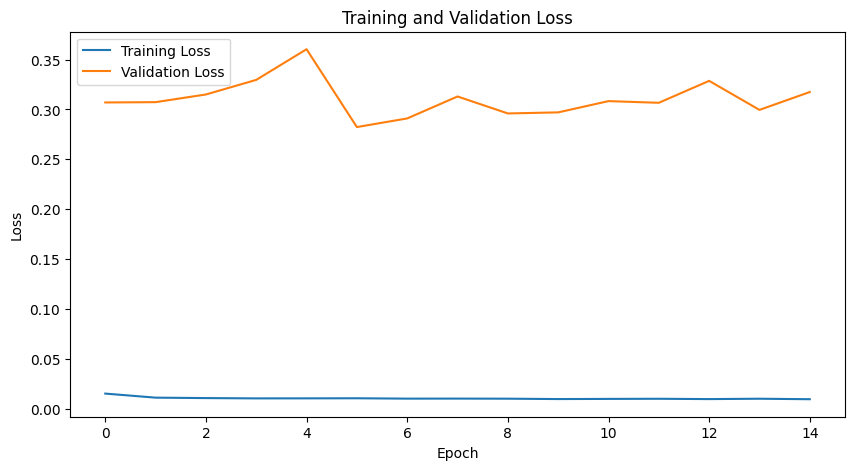

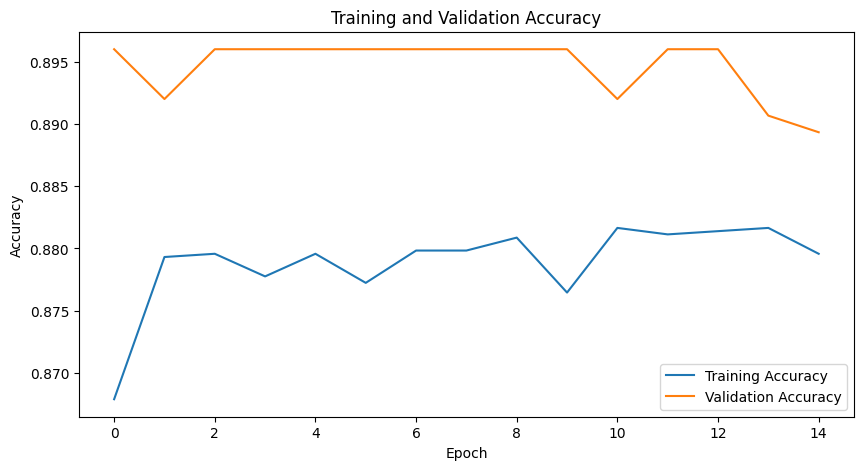

Avg Test Loss:  0.15750807854864332
Test Accuracy:  0.9565217391304348


In [9]:
from resnet import ResNet, ResidualBlock
from train_eval import train, evaluate
import torch 
import torch.nn as nn
from plot import plot_loss_acc

num_classes = 2
num_epochs = 15
batch_size = 32
learning_rate = 0.01

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('mps')
print(device)
model = ResNet(ResidualBlock, [3, 4, 6, 3]).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.01, momentum = 0.9)  

history = train(model, train_loader, val_loader, optim, criterion, device, num_epochs)
avg_loss, acc = evaluate(model, test_loader, criterion, device)

plot_loss_acc(history)
#plot_confusion_matrix(model, val_data_loader, "cpu")

print("Avg Test Loss: ", avg_loss)
print("Test Accuracy: ", acc)